In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None) 
from sklearn import preprocessing
import datetime as dt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv('sample.csv', sep=',')
df = df.drop(columns=['Unnamed: 0'])
df.head(10)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-06-18,DL,DL,DL,2653,DL,N321US,2653,14492,RDU,"Raleigh/Durham, NC",10397,ATL,"Atlanta, GA",730,723.0,-7.0,38.0,801.0,853.0,6.0,856,859.0,3.0,0.0,NaN,0.0,N,86.0,96.0,52.0,1.0,356.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-11-30,DL,DL_CODESHARE,DL,5211,9E,N8980A,5211,13487,MSP,"Minneapolis, MN",11203,CWA,"Mosinee, WI",1019,1014.0,-5.0,48.0,1102.0,1140.0,6.0,1117,1146.0,29.0,0.0,NaN,0.0,N,58.0,92.0,38.0,1.0,175.0,0.0,0.0,29.0,0.0,0.0,NaN,NaN,NaN,NaN
2,2018-10-23,AA,AA_CODESHARE,AA,4715,YX,N124HQ,4715,14576,ROC,"Rochester, NY",11057,CLT,"Charlotte, NC",1850,1842.0,-8.0,13.0,1855.0,2028.0,28.0,2055,2056.0,1.0,0.0,NaN,0.0,N,125.0,134.0,93.0,1.0,573.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-04-29,AA,AA,AA,2807,AA,N957AN,2807,13303,MIA,"Miami, FL",15304,TPA,"Tampa, FL",1335,1356.0,21.0,22.0,1418.0,1458.0,10.0,1438,1508.0,30.0,0.0,NaN,0.0,N,63.0,72.0,40.0,1.0,204.0,21.0,0.0,9.0,0.0,0.0,NaN,NaN,NaN,NaN
4,2018-07-17,UA,UA_CODESHARE,UA,5698,OO,N925EV,5698,13930,ORD,"Chicago, IL",14696,SBN,"South Bend, IN",1944,2035.0,51.0,19.0,2054.0,2214.0,5.0,2135,2219.0,44.0,0.0,NaN,0.0,N,51.0,44.0,20.0,1.0,84.0,0.0,0.0,0.0,0.0,44.0,NaN,NaN,NaN,NaN
5,2019-12-02,UA,UA,UA,2363,UA,N37277,2363,14771,SFO,"San Francisco, CA",11433,DTW,"Detroit, MI",1046,1154.0,68.0,20.0,1214.0,1900.0,7.0,1824,1907.0,43.0,0.0,NaN,0.0,N,278.0,253.0,226.0,1.0,2079.0,11.0,0.0,0.0,0.0,32.0,NaN,NaN,NaN,NaN
6,2019-04-15,UA,UA,UA,1583,UA,N473UA,1583,12889,LAS,"Las Vegas, NV",11618,EWR,"Newark, NJ",2345,144.0,119.0,11.0,155.0,856.0,13.0,735,909.0,94.0,0.0,NaN,0.0,N,290.0,265.0,241.0,1.0,2227.0,2.0,0.0,0.0,0.0,92.0,NaN,NaN,NaN,NaN
7,2018-06-01,B6,B6,B6,678,B6,N779JB,678,12451,JAX,"Jacksonville, FL",12478,JFK,"New York, NY",1149,1156.0,7.0,24.0,1220.0,1430.0,8.0,1408,1438.0,30.0,0.0,NaN,0.0,N,139.0,162.0,130.0,1.0,828.0,7.0,0.0,23.0,0.0,0.0,NaN,NaN,NaN,NaN
8,2019-04-20,AA,AA,AA,2809,AA,N823NN,2809,12953,LGA,"New York, NY",13303,MIA,"Miami, FL",1929,2124.0,115.0,13.0,2137.0,40.0,6.0,2245,46.0,121.0,0.0,NaN,0.0,N,196.0,202.0,183.0,1.0,1096.0,18.0,0.0,6.0,0.0,97.0,NaN,NaN,NaN,NaN
9,2018-12-21,DL,DL,DL,1307,DL,N956DL,1307,10397,ATL,"Atlanta, GA",14492,RDU,"Raleigh/Durham, NC",1539,1539.0,0.0,17.0,1556.0,1658.0,10.0,1700,1708.0,8.0,0.0,NaN,0.0,N,81.0,89.0,62.0,1.0,356.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(105000, 42)

In [4]:
weather = pd.read_csv('weather_data.csv', sep=',')
weather.head()

,airport,fl_date,precip,snow,snowdepth,windgust,cloudcover,weather
0,ATL,2018-01-01,0.0,0.0,0.0,40.7,74.3,cloudly
1,ATL,2018-01-02,0.0,0.0,0.0,0.0,29.6,cloudly
2,ATL,2018-01-03,0.0,0.0,0.0,29.5,67.1,cloudly
3,ATL,2018-01-04,0.0,0.0,0.0,51.8,6.9,wind
4,ATL,2018-01-05,0.0,0.0,0.0,37.1,28.0,cloudly


In [5]:
weather['weather'] = weather['weather'].replace({'cloudly':'cloudy'})

In [6]:
weather['weather'].value_counts()

cloudy    2696
rainy     2175
wind       609
sunny      537
snow       181
Name: weather, dtype: int64

In [7]:
weather['origin_date'] = weather['airport']+weather['fl_date']
weather = weather.drop(columns=['airport', 'fl_date'])
weather

,precip,snow,snowdepth,windgust,cloudcover,weather,origin_date
0,0.00,0.0,0.0,40.7,74.3,cloudy,ATL2018-01-01
1,0.00,0.0,0.0,0.0,29.6,cloudy,ATL2018-01-02
2,0.00,0.0,0.0,29.5,67.1,cloudy,ATL2018-01-03
3,0.00,0.0,0.0,51.8,6.9,wind,ATL2018-01-04
4,0.00,0.0,0.0,37.1,28.0,cloudy,ATL2018-01-05
...,...,...,...,...,...,...,...
6193,1.09,0.0,0.0,0.0,93.6,rainy,SEA2019-12-27
6194,0.00,0.0,0.0,0.0,73.2,cloudy,SEA2019-12-28
6195,0.30,0.0,0.0,0.0,79.3,rainy,SEA2019-12-29
6196,0.79,0.0,0.0,37.1,86.6,rainy,SEA2019-12-30


In [8]:
# select cols to keep
df1 = df.drop(columns=['branded_code_share', 'mkt_carrier', 'op_unique_carrier', 'op_carrier_fl_num', \
                       'origin_airport_id', 'origin_city_name', 'dest_airport_id', 'dest_city_name', 'tail_num', \
                       'dup', 'diverted', 'cancellation_code', 'no_name', 'first_dep_time', 'total_add_gtime', \
                       'longest_add_gtime', 'cancelled'])

In [9]:
df1['origin_date'] = df1['origin'] + df1['fl_date']

In [10]:
df1.head()

,fl_date,mkt_unique_carrier,mkt_carrier_fl_num,origin,dest,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,origin_date
0,2018-06-18,DL,2653,RDU,ATL,730,723.0,-7.0,38.0,801.0,853.0,6.0,856,859.0,3.0,86.0,96.0,52.0,1.0,356.0,NaN,NaN,NaN,NaN,NaN,RDU2018-06-18
1,2019-11-30,DL,5211,MSP,CWA,1019,1014.0,-5.0,48.0,1102.0,1140.0,6.0,1117,1146.0,29.0,58.0,92.0,38.0,1.0,175.0,0.0,0.0,29.0,0.0,0.0,MSP2019-11-30
2,2018-10-23,AA,4715,ROC,CLT,1850,1842.0,-8.0,13.0,1855.0,2028.0,28.0,2055,2056.0,1.0,125.0,134.0,93.0,1.0,573.0,NaN,NaN,NaN,NaN,NaN,ROC2018-10-23
3,2019-04-29,AA,2807,MIA,TPA,1335,1356.0,21.0,22.0,1418.0,1458.0,10.0,1438,1508.0,30.0,63.0,72.0,40.0,1.0,204.0,21.0,0.0,9.0,0.0,0.0,MIA2019-04-29
4,2018-07-17,UA,5698,ORD,SBN,1944,2035.0,51.0,19.0,2054.0,2214.0,5.0,2135,2219.0,44.0,51.0,44.0,20.0,1.0,84.0,0.0,0.0,0.0,0.0,44.0,ORD2018-07-17


In [11]:
df1 = df1.merge(weather, how = 'left', left_on = 'origin_date', right_on='origin_date')
df1

,fl_date,mkt_unique_carrier,mkt_carrier_fl_num,origin,dest,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,origin_date,precip,snow,snowdepth,windgust,cloudcover,weather
0,2018-06-18,DL,2653,RDU,ATL,730,723.0,-7.0,38.0,801.0,853.0,6.0,856,859.0,3.0,86.0,96.0,52.0,1.0,356.0,NaN,NaN,NaN,NaN,NaN,RDU2018-06-18,0.0,0.0,0.0,0.0,65.7,cloudy
1,2019-11-30,DL,5211,MSP,CWA,1019,1014.0,-5.0,48.0,1102.0,1140.0,6.0,1117,1146.0,29.0,58.0,92.0,38.0,1.0,175.0,0.0,0.0,29.0,0.0,0.0,MSP2019-11-30,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-10-23,AA,4715,ROC,CLT,1850,1842.0,-8.0,13.0,1855.0,2028.0,28.0,2055,2056.0,1.0,125.0,134.0,93.0,1.0,573.0,NaN,NaN,NaN,NaN,NaN,ROC2018-10-23,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-04-29,AA,2807,MIA,TPA,1335,1356.0,21.0,22.0,1418.0,1458.0,10.0,1438,1508.0,30.0,63.0,72.0,40.0,1.0,204.0,21.0,0.0,9.0,0.0,0.0,MIA2019-04-29,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-07-17,UA,5698,ORD,SBN,1944,2035.0,51.0,19.0,2054.0,2214.0,5.0,2135,2219.0,44.0,51.0,44.0,20.0,1.0,84.0,0.0,0.0,0.0,0.0,44.0,ORD2018-07-17,0.0,0.0,0.0,37.1,32.9,cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,2018-04-08,UA,4007,LAN,ORD,605,558.0,-7.0,24.0,622.0,558.0,10.0,620,608.0,-12.0,75.0,70.0,36.0,1.0,179.0,NaN,NaN,NaN,NaN,NaN,LAN2018-04-08,NaN,NaN,NaN,NaN,NaN,NaN
104996,2019-03-04,DL,1868,ATL,ORF,2227,2225.0,-2.0,16.0,2241.0,2343.0,4.0,3,2347.0,-16.0,96.0,82.0,62.0,1.0,516.0,NaN,NaN,NaN,NaN,NaN,ATL2019-03-04,0.0,0.0,0.0,55.3,83.8,wind
104997,2018-07-18,UA,341,EWR,IAH,2036,2040.0,4.0,25.0,2105.0,2258.0,4.0,2310,2302.0,-8.0,214.0,202.0,173.0,1.0,1400.0,NaN,NaN,NaN,NaN,NaN,EWR2018-07-18,NaN,NaN,NaN,NaN,NaN,NaN
104998,2019-02-02,WN,4905,MCO,DEN,2000,2011.0,11.0,12.0,2023.0,2158.0,8.0,2210,2206.0,-4.0,250.0,235.0,215.0,1.0,1546.0,NaN,NaN,NaN,NaN,NaN,MCO2019-02-02,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# change flight date to datetime
df1['fl_date'] = pd.to_datetime(df1['fl_date'])
#df1.dtypes

In [13]:
# create year, month, day, dayofweek columns
df1['year'] = df1['fl_date'].dt.year
df1['month'] = df1['fl_date'].dt.month
df1['day'] = df1['fl_date'].dt.day
df1['dayofweek'] = df1['fl_date'].dt.dayofweek

In [14]:
# check for null values and drop if there are any
df1['dep_time'].isnull().sum()
df1['arr_time'].isnull().sum()

0

In [15]:
df1 = df1.dropna(axis=0, subset=['dep_time', 'arr_time'])

In [16]:
# change datatype to int first to lose the decimal and then convert to string
df1['crs_dep_time'] = df1['crs_dep_time'].astype(int)
df1['crs_arr_time'] = df1['crs_arr_time'].astype(int)
df1['crs_dep_time'] = df1['crs_dep_time'].astype(str)
df1['crs_arr_time'] = df1['crs_arr_time'].astype(str)

In [17]:
# create departure hour and arrival hour columns
df1['crs_dep_time'] = df1['crs_dep_time'].apply(lambda x: str(x).zfill(4))
df1['crs_arr_time'] = df1['crs_arr_time'].apply(lambda x: str(x).zfill(4))
df1['dep_h'] = df1['crs_dep_time'].str[0:2]
df1['arr_h'] = df1['crs_arr_time'].str[0:2]
df1['dep_h'] = df1['dep_h'].replace('24', '00')  #some values have hour as 24. Assuming here that it means 00
df1['arr_h'] = df1['arr_h'].replace('24', '00')

In [18]:
df1.head()

,fl_date,mkt_unique_carrier,mkt_carrier_fl_num,origin,dest,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,origin_date,precip,snow,snowdepth,windgust,cloudcover,weather,year,month,day,dayofweek,dep_h,arr_h
0,2018-06-18,DL,2653,RDU,ATL,0730,723.0,-7.0,38.0,801.0,853.0,6.0,0856,859.0,3.0,86.0,96.0,52.0,1.0,356.0,NaN,NaN,NaN,NaN,NaN,RDU2018-06-18,0.0,0.0,0.0,0.0,65.7,cloudy,2018,6,18,0,07,08
1,2019-11-30,DL,5211,MSP,CWA,1019,1014.0,-5.0,48.0,1102.0,1140.0,6.0,1117,1146.0,29.0,58.0,92.0,38.0,1.0,175.0,0.0,0.0,29.0,0.0,0.0,MSP2019-11-30,NaN,NaN,NaN,NaN,NaN,NaN,2019,11,30,5,10,11
2,2018-10-23,AA,4715,ROC,CLT,1850,1842.0,-8.0,13.0,1855.0,2028.0,28.0,2055,2056.0,1.0,125.0,134.0,93.0,1.0,573.0,NaN,NaN,NaN,NaN,NaN,ROC2018-10-23,NaN,NaN,NaN,NaN,NaN,NaN,2018,10,23,1,18,20
3,2019-04-29,AA,2807,MIA,TPA,1335,1356.0,21.0,22.0,1418.0,1458.0,10.0,1438,1508.0,30.0,63.0,72.0,40.0,1.0,204.0,21.0,0.0,9.0,0.0,0.0,MIA2019-04-29,NaN,NaN,NaN,NaN,NaN,NaN,2019,4,29,0,13,14
4,2018-07-17,UA,5698,ORD,SBN,1944,2035.0,51.0,19.0,2054.0,2214.0,5.0,2135,2219.0,44.0,51.0,44.0,20.0,1.0,84.0,0.0,0.0,0.0,0.0,44.0,ORD2018-07-17,0.0,0.0,0.0,37.1,32.9,cloudy,2018,7,17,1,19,21


In [19]:
df1['route'] = df1['origin'] + df1['dest']


### Create a dataframe using same columns as in the test file

In [20]:
df_test = df1[['month', 'day', 'dayofweek', 'mkt_unique_carrier', 'mkt_carrier_fl_num', 'origin', \
               'dest', 'route','dep_h', 'arr_h', 'crs_elapsed_time', 'distance', 'precip', 'snow', 'snowdepth', \
               'windgust', 'cloudcover', 'weather', 'arr_delay']]

In [21]:
df_test.isnull().sum()

month                     0
day                       0
dayofweek                 0
mkt_unique_carrier        0
mkt_carrier_fl_num        0
origin                    0
dest                      0
route                     0
dep_h                     0
arr_h                     0
crs_elapsed_time          0
distance                  0
precip                77738
snow                  77738
snowdepth             77738
windgust              77738
cloudcover            77738
weather               77738
arr_delay                 0
dtype: int64

In [22]:
df_test = df_test.copy()
df_test['precip'] = df_test['precip'].fillna(0)
df_test['snow'] = df_test['snow'].fillna(0)
df_test['snowdepth'] = df_test['snowdepth'].fillna(0)
df_test['windgust'] = df_test['windgust'].fillna(0)
df_test['cloudcover'] = df_test['cloudcover'].fillna(0)
df_test['weather'] = df_test['weather'].fillna('clear')

In [23]:
df_test.isnull().sum()

month                 0
day                   0
dayofweek             0
mkt_unique_carrier    0
mkt_carrier_fl_num    0
origin                0
dest                  0
route                 0
dep_h                 0
arr_h                 0
crs_elapsed_time      0
distance              0
precip                0
snow                  0
snowdepth             0
windgust              0
cloudcover            0
weather               0
arr_delay             0
dtype: int64

In [24]:
df_test = df_test.dropna()

In [25]:
df_test.head()

,month,day,dayofweek,mkt_unique_carrier,mkt_carrier_fl_num,origin,dest,route,dep_h,arr_h,crs_elapsed_time,distance,precip,snow,snowdepth,windgust,cloudcover,weather,arr_delay
0,6,18,0,DL,2653,RDU,ATL,RDUATL,07,08,86.0,356.0,0.0,0.0,0.0,0.0,65.7,cloudy,3.0
1,11,30,5,DL,5211,MSP,CWA,MSPCWA,10,11,58.0,175.0,0.0,0.0,0.0,0.0,0.0,clear,29.0
2,10,23,1,AA,4715,ROC,CLT,ROCCLT,18,20,125.0,573.0,0.0,0.0,0.0,0.0,0.0,clear,1.0
3,4,29,0,AA,2807,MIA,TPA,MIATPA,13,14,63.0,204.0,0.0,0.0,0.0,0.0,0.0,clear,30.0
4,7,17,1,UA,5698,ORD,SBN,ORDSBN,19,21,51.0,84.0,0.0,0.0,0.0,37.1,32.9,cloudy,44.0


In [26]:
data = df_test.copy()

### Change target variable from numerical to categorical

In [27]:
data['arr_delay'].describe()

count    105000.00000
mean         14.63099
std          60.04158
min         -73.00000
25%         -12.00000
50%           1.00000
75%          19.00000
max        1861.00000
Name: arr_delay, dtype: float64

In [28]:
data[data['arr_delay']>0].shape[0]

55000

In [29]:
data[data['arr_delay']<0].shape[0]

50000

In [30]:
import numpy as np
labels = ['on_time', 'late']
bins = [-80, 0, 2000]
data['arr_delay']= pd.cut(data['arr_delay'],
                                          labels=labels,
                                          bins=bins,
                                          precision=0)
data.head()

,month,day,dayofweek,mkt_unique_carrier,mkt_carrier_fl_num,origin,dest,route,dep_h,arr_h,crs_elapsed_time,distance,precip,snow,snowdepth,windgust,cloudcover,weather,arr_delay
0,6,18,0,DL,2653,RDU,ATL,RDUATL,07,08,86.0,356.0,0.0,0.0,0.0,0.0,65.7,cloudy,late
1,11,30,5,DL,5211,MSP,CWA,MSPCWA,10,11,58.0,175.0,0.0,0.0,0.0,0.0,0.0,clear,late
2,10,23,1,AA,4715,ROC,CLT,ROCCLT,18,20,125.0,573.0,0.0,0.0,0.0,0.0,0.0,clear,late
3,4,29,0,AA,2807,MIA,TPA,MIATPA,13,14,63.0,204.0,0.0,0.0,0.0,0.0,0.0,clear,late
4,7,17,1,UA,5698,ORD,SBN,ORDSBN,19,21,51.0,84.0,0.0,0.0,0.0,37.1,32.9,cloudy,late


In [31]:
data['arr_delay'].value_counts()

late       55000
on_time    50000
Name: arr_delay, dtype: int64

In [32]:
data.shape

(105000, 19)

In [33]:
# convert remaining numeric data to int for modelling
data['dep_h'] = data['dep_h'].astype(int)
data['arr_h'] = data['arr_h'].astype(int)
data.dtypes

month                    int64
day                      int64
dayofweek                int64
mkt_unique_carrier      object
mkt_carrier_fl_num       int64
origin                  object
dest                    object
route                   object
dep_h                    int64
arr_h                    int64
crs_elapsed_time       float64
distance               float64
precip                 float64
snow                   float64
snowdepth              float64
windgust               float64
cloudcover             float64
weather                 object
arr_delay             category
dtype: object

In [35]:
# function to label encode desired columns
def label_encode(df, cols):
    le = preprocessing.LabelEncoder()
    for i in cols:
        df[i] = le.fit_transform(df[i].values)
    return df

In [38]:
# define columns to encode
cols_to_encode = ['mkt_unique_carrier', 'origin', 'dest', 'route', 'weather', 'arr_delay']
data = label_encode(data, cols_to_encode)
data.dtypes

month                   int64
day                     int64
dayofweek               int64
mkt_unique_carrier      int64
mkt_carrier_fl_num      int64
origin                  int64
dest                    int64
route                   int64
dep_h                   int64
arr_h                   int64
crs_elapsed_time      float64
distance              float64
precip                float64
snow                  float64
snowdepth             float64
windgust              float64
cloudcover            float64
weather                 int64
arr_delay               int64
dtype: object

In [39]:
data.head()

,month,day,dayofweek,mkt_unique_carrier,mkt_carrier_fl_num,origin,dest,route,dep_h,arr_h,crs_elapsed_time,distance,precip,snow,snowdepth,windgust,cloudcover,weather,arr_delay
0,6,18,0,3,2653,294,21,4730,7,8,86.0,356.0,0.0,0.0,0.0,0.0,65.7,1,0
1,11,30,5,3,5211,240,86,3663,10,11,58.0,175.0,0.0,0.0,0.0,0.0,0.0,0,0
2,10,23,1,0,4715,301,73,4834,18,20,125.0,573.0,0.0,0.0,0.0,0.0,0.0,0,0
3,4,29,0,0,2807,226,349,3536,13,14,63.0,204.0,0.0,0.0,0.0,0.0,0.0,0,0
4,7,17,1,8,5698,254,311,4136,19,21,51.0,84.0,0.0,0.0,0.0,37.1,32.9,1,0


## Sanity Check using one model that the dataset works

In [40]:
scaler = preprocessing.StandardScaler()
X = data.drop(columns='arr_delay').values
y = data['arr_delay'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Standardize the data using only statistics from the training set
# (always assume no knowledge of the test set for most unbiased performance estimate)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [41]:

from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [42]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=500, max_depth=5)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [43]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5786984126984127


In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[11440,  5142],
       [ 8129,  6789]])

In [45]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
precision

0.5690218757857681

In [46]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
recall

0.45508781337980964

In [51]:
result = pd.DataFrame({'actual': y_test, 'predicted': y_pred})
result['predicted'].value_counts()

0    18573
1    12927
Name: predicted, dtype: int64

In [57]:
from xgboost import XGBClassifier

xgbc = XGBClassifier()

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=5000, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1) 

xgbc.fit(X_train, y_train)

y_pred = xgbc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[13:59:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.5934285714285714


In [58]:
confusion_matrix(y_test, y_pred)

array([[10672,  5910],
       [ 6897,  8021]])

In [59]:
precision = precision_score(y_test, y_pred)
precision

0.5757662766491997

In [60]:
recall = recall_score(y_test, y_pred)
recall

0.5376726102694731

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
k_folds = 5
params = {'n_estimators': [500, 1000, 5000], 'max_depth': [1, 3, 5, 7, 12]}

In [ ]:
rf = RandomForestClassifier()
grid = GridSearchCV(estimator=rf, param_grid=params, cv=k_folds, scoring='r2', verbose=1, n_jobs=-1) 
grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [ ]:
best_model = grid_result.best_estimator_
best_n_estimators = grid_result.best_params_['n_estimators']
best_max_depth = grid_result.best_params_['max_depth']
print(best_n_estimators, best_max_depth)

In [ ]:
y_pred = best_model.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

In [47]:
data.columns

Index(['month', 'day', 'dayofweek', 'mkt_unique_carrier', 'mkt_carrier_fl_num',
       'origin', 'dest', 'route', 'dep_h', 'arr_h', 'crs_elapsed_time',
       'distance', 'precip', 'snow', 'snowdepth', 'windgust', 'cloudcover',
       'weather', 'arr_delay'],
      dtype='object')

In [50]:
cols = ['month', 'day', 'dayofweek', 'mkt_unique_carrier', 'mkt_carrier_fl_num',
       'origin', 'dest', 'route', 'dep_h', 'arr_h', 'crs_elapsed_time',
       'distance', 'precip', 'snow', 'snowdepth', 'windgust', 'cloudcover',
       'weather']

In [51]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=cols).sort_values(ascending=False)
feature_imp

dep_h                 0.295585
arr_h                 0.249736
precip                0.112226
mkt_unique_carrier    0.087031
month                 0.032380
weather               0.028692
route                 0.028387
dest                  0.023742
cloudcover            0.023447
origin                0.016411
windgust              0.015870
distance              0.014160
snowdepth             0.013982
mkt_carrier_fl_num    0.013083
dayofweek             0.012106
snow                  0.011546
crs_elapsed_time      0.011116
day                   0.010500
dtype: float64

No handles with labels found to put in legend.


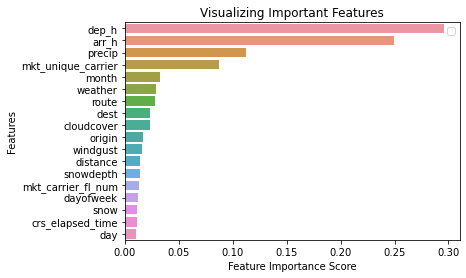

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()